# Title

**Exercise: B.1 - Beta values for Data from Random Universe using Bootstrap**

# Description

Solve the previous exercise by building your own bootstrap function.

# Instructions

Define a function bootstrap that takes a dataframe as the input. Use NumPy's random.randint() function to generate random integers in the range of the length of the dataset. These integers will be used as the indices to access the rows of the dataset.

Similar to the previous exercise, compute the $\beta_0$ and $\beta_1$ values for each instance of the dataframe.

Plot the $\beta_0$, $\beta_1$ histograms.

# Hints

To compute the beta values use the following equations:

$\beta_{0}=\bar{y}-\left(b_{1} * \bar{x}\right)$

$\beta_{1}=\frac{\sum(x-\bar{x}) *(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

where $\bar{x}$ is the mean of $x$ and $\bar{y}$ is the mean of $y$


<a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html" target="_blank">np.random.randint()</a> : Returns list of integers as per mentioned size 

<a href="https://numpy.org/doc/stable/reference/generated/numpy.dot.html" target="_blank">np.dot()</a> : Computes the dot product of two arrays


<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html" target="_blank">df.iloc[]</a> : Purely integer-location based indexing for selection by position


<a href="https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axes.Axes.hist.html" target="_blank">ax.hist()</a> : Plots a histogram


<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html" target="_blank">ax.set_xlabel()</a> : Sets label for x-axthe is


<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html" target="_blank">ax.set_ylabel()</a> : Sets label for the y-axis


Note: This exercise is **auto-graded and you can try multiple attempts.**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from randomuniverse import RandomUniverse
%matplotlib inline

/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_29068/3088302497.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Reading the standard Advertising dataset

In [2]:
# Read the file "Advertising_csv"
df = pd.read_csv('data/advertising_adj.csv')

In [3]:
# Take a quick look at the data
df.head()

,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [4]:
# Define a bootstrap function, which inputs a dataframe & outputs a bootstrapped dataframe
def bootstrap(df):
    # Step 1: Randomly select indices with replacement
    selectionIndex = np.random.randint(0, len(df), size=len(df))
    # Step 2: Use the selected indices to create a new dataframe (bootstrapped sample)
    new_df = df.iloc[selectionIndex]
    
    return new_df


In [5]:
# Create two empty lists to store beta values
beta0_list, beta1_list = [],[]


# For each instance of the for loop, call your bootstrap function, calculate the beta values
# Store the beta values in the appropriate list

#Choose the number of "parallel" Universes to generate the new dataset
number_of_bootstraps = 1000

for i in range(number_of_bootstraps):
    df_new = bootstrap(df)

# x is the predictor variable given by 'tv' values 
# y is the reponse variable given by 'sales' values
    x = df_new["tv"]
    y = df_new["sales"]

#Find the mean of the x values
    xmean = x.mean()

#Find the mean of the y values
    ymean = y.mean()
    
# Using equations given and discussed in lecture compute the beta0 and beta1 values
# Hint: use np.dot to perform the mulitplication operation
    beta1 = np.sum((df_new.tv-xmean) * (df_new.sales-ymean)) / np.sum((df_new.tv-xmean)**2)
    beta0 = ymean-beta1*xmean

# Append the calculated values of beta1 and beta0
    beta0_list.append(beta0)
    beta1_list.append(beta1)

In [6]:
### edTest(test_beta) ###

#Compute the mean of the beta0 and beta1 lists
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)

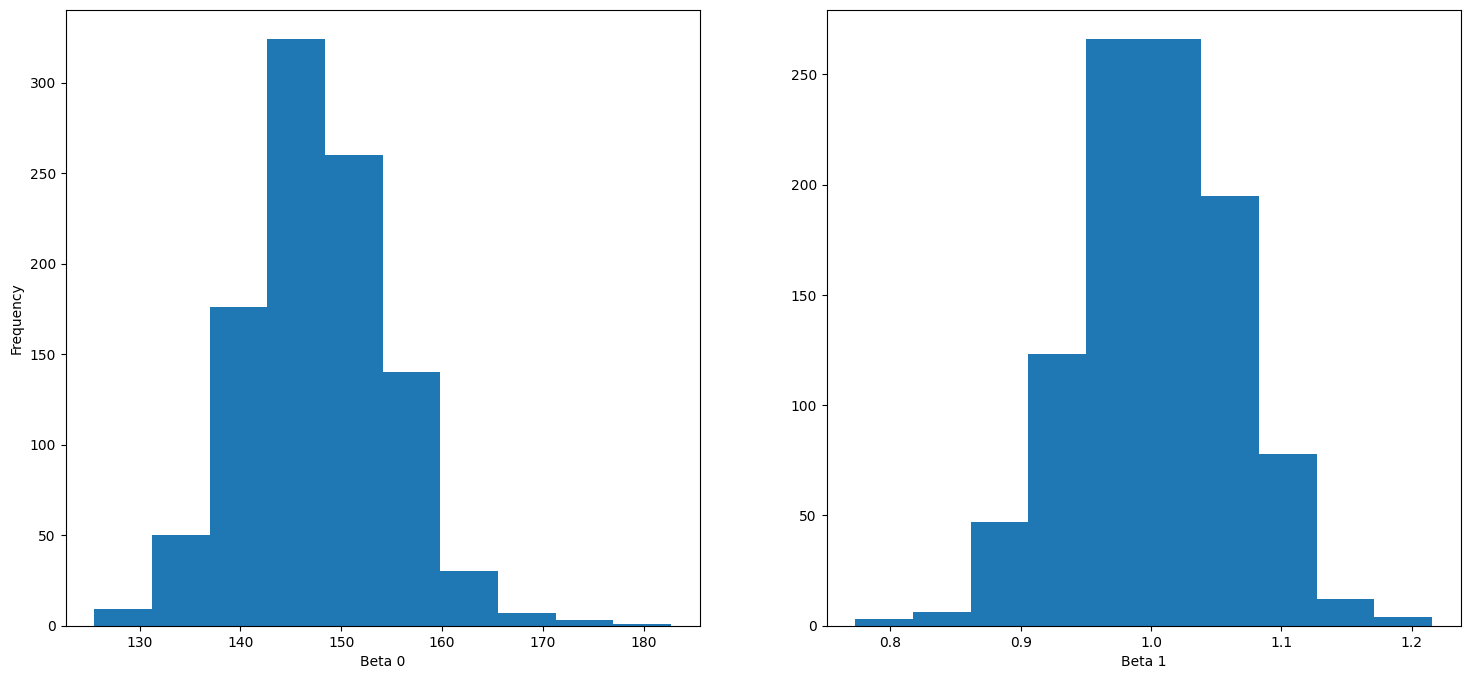

In [7]:
# plot histogram of beta0 and beta1
fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list)
ax[1].hist(beta1_list)
ax[0].set_xlabel('Beta 0')
ax[1].set_xlabel('Beta 1')
ax[0].set_ylabel('Frequency');


### Compare the plots with the results from the RandomUniverse() function

In [8]:
# The below helper code will help you visualise the similarity between
# the bootstrap function you wrote & the RandomUniverse() function from last exercise
beta0_randUni, beta1_randUni = [],[]

parallelUniverses = 1000

for i in range(parallelUniverses):
    df_new = RandomUniverse(df)
    
    xmean = df_new.tv.mean()
    ymean = df_new.sales.mean()

# Using Linear Algebra result as discussed in lecture
    beta1 = np.dot((x-xmean) , (y-ymean))/((x-xmean)**2).sum()
    beta0 = ymean - beta1*xmean

    beta0_randUni.append(beta0)
    beta1_randUni.append(beta1)

In [9]:
# Use this helper code to plot the bootstrapped beta values & the ones from random universe
def plotmulti(list1, list2):
    fig, axes = plt.subplots(1,2, figsize = (10,4), sharey = 'row')
    axes[0].hist(list1);
    axes[0].set_xlabel('Beta Distribution')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Bootstrap')
    axes[1].hist(list2);
    axes[1].set_xlabel('Beta Distribution')
    axes[1].set_title('Random Universe')

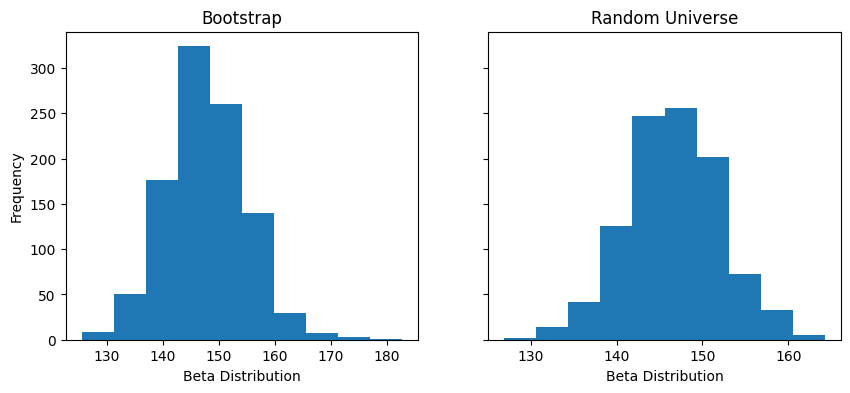

In [10]:
# Just use the 'plotmulti' function above to compare the two histograms for beta0
plotmulti(beta0_list, beta0_randUni)

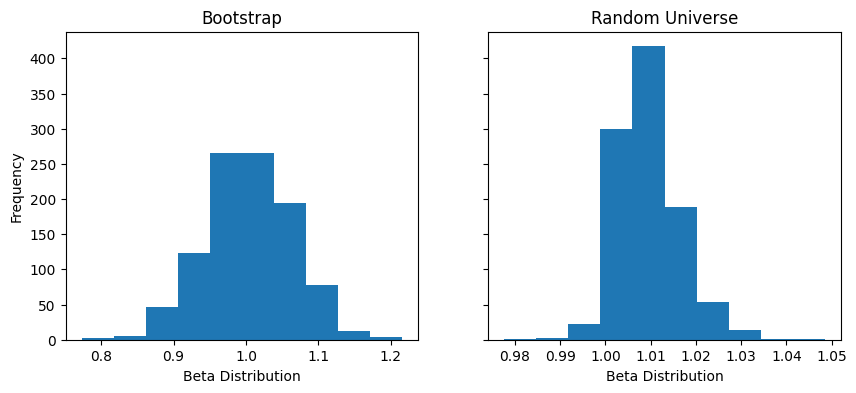

In [11]:
#Now compare for beta1
plotmulti(beta1_list, beta1_randUni)